**Лабораторна робота №3. Кластеризація**

Приблизний строк виконання - 6 годин

**Рекомендована дата здачі: 28 листопада 2021 року**

Виконала студентка групи [КМ-11мн] [Коваленко Олександра Петрівна]

Студент здав роботу: (заповнюється викладачем відповідно до дати повідомлення з роботою у Slack)

Студент захистив роботу на оцінку: (заповнюється викладачем)

**Частина 1. Основи кластеризації**
1. Обрати відповідний файл з даними.
2. Обравши всі стовпчики, крім останнього:

a) Провести розбиття методом K-means на два та три кластери.
Проілюструвати результати розбиття графічно.

b) Провести розбиття на аналогічну кількість кластерів за
допомогою інших двох методів (один з яких використовує
аналогічну метрику, а другий – іншу). Результати розбиття
проілюструвати графічно, виконати порівняльний аналіз
отриманих результатів із результатами попереднього пункту.

c) Збудувати дендрограму для перших 100 записів.

d) Обчисліть діаметр, радіус, щільність, міжкластерну відстань і  характеристики близькості (подібності) кластерів.

3. Проаналізувати отримані результати, враховуючи останній стовпчик
початкових даних.
4. Для отримання результатів можна використовувати бібліотеки для
мови Python (наприклад, scikit-learn або аналогічні).
5. Виконати пункти 2-3, застосувавши метод K-Means і декілька варіантів кількості кластерів. Визначте оптимальну кількість кластерів.
6. Виконати пункти 2-3, застосувавши алгоритм DBSCAN і ще один будь-який алгоритм з використаної бібліотеки.


###Обрати відповідний файл з даними.

In [ ]:
pip install scipy

In [ ]:
from scipy.spatial.distance import cdist

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
import plotly.figure_factory as ff
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
file_url = "https://raw.githubusercontent.com/IvanSergeyevichZhuk/ML_KPI/main/Data/Lab3/Part1/MN/MN09-Kovalenko.csv"
data = pd.read_csv(file_url, sep=';', decimal=',',header=None)
data

,0,1,2,3,4,5,6,7
0,0.63,0.5,0.175,1.1105,0.467,0.268,0.329,10
1,0.63,0.455,0.15,1.1315,0.481,0.2745,0.305,9
2,0.63,0.48,0.15,1.271,0.6605,0.2425,0.31,11
3,0.63,0.49,0.225,1.336,0.6805,0.259,0.3245,10
4,0.635,0.505,0.145,1.1345,0.505,0.2655,0.315,10
...,...,...,...,...,...,...,...,...
245,0.69,0.55,0.2,1.569,0.687,0.3675,0.46,12
246,0.7,0.565,0.175,1.8565,0.8445,0.3935,0.54,10
247,0.7,0.535,0.175,1.773,0.6805,0.48,0.512,15
248,0.705,0.545,0.17,1.58,0.6435,0.4565,0.265,11


In [ ]:
data[7].unique()

array([10,  9, 11,  8, 12, 13,  5,  6,  7, 14, 15])

In [ ]:
df = data.drop(columns=7)
df

,0,1,2,3,4,5,6
0,0.63,0.5,0.175,1.1105,0.467,0.268,0.329
1,0.63,0.455,0.15,1.1315,0.481,0.2745,0.305
2,0.63,0.48,0.15,1.271,0.6605,0.2425,0.31
3,0.63,0.49,0.225,1.336,0.6805,0.259,0.3245
4,0.635,0.505,0.145,1.1345,0.505,0.2655,0.315
...,...,...,...,...,...,...,...
245,0.69,0.55,0.2,1.569,0.687,0.3675,0.46
246,0.7,0.565,0.175,1.8565,0.8445,0.3935,0.54
247,0.7,0.535,0.175,1.773,0.6805,0.48,0.512
248,0.705,0.545,0.17,1.58,0.6435,0.4565,0.265


In [ ]:
st = StandardScaler().fit_transform(df)
st

array([[ 0.59432738,  0.69692043,  0.79236885, ...,  0.11772832,
         0.5284843 ,  0.49069186],
       [ 0.59432738,  0.14575313,  0.04145068, ...,  0.18092119,
         0.59087347,  0.28823338],
       [ 0.59432738,  0.45195718,  0.04145068, ...,  0.99114409,
         0.28372677,  0.33041223],
       ...,
       [ 1.30695013,  1.12560611,  0.79236885, ...,  1.08141962,
         2.56333121,  2.03443774],
       [ 1.35785176,  1.24808773,  0.64218522, ...,  0.91440989,
         2.33777035, -0.04919741],
       [ 1.40875339,  1.61553259,  1.99383792, ...,  2.47617658,
         2.25138534,  1.95008004]])

###K-means 2

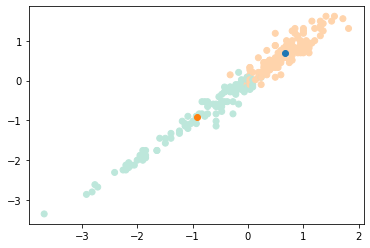

In [ ]:
k_means2 = KMeans(n_clusters = 2)
k_means2.fit(st)
centers = k_means2.cluster_centers_
labels2 =k_means2.labels_
plt.scatter(st[:,0],st[:,1], c=labels2, cmap = 'icefire_r')
plt.scatter(centers[0][0],centers[0][1])
plt.scatter(centers[1][0],centers[1][1])


In [ ]:
dot = pd.DataFrame(data = st)
dot[7] = pd.DataFrame(data = labels2)

In [ ]:
#діаметри
class_0 = dot[dot[7] == 0].reset_index(drop=True).drop(columns = 7)
class_1 = dot[dot[7] == 1].reset_index(drop=True).drop(columns = 7)

dists0 = euclidean_distances(class_0).max()
dists1 = euclidean_distances(class_1).max()

dists0, dists1

(7.039754338348936, 7.061222880807566)

In [ ]:
#радіус
radius_class_0 = np.linalg.norm(class_0 - centers[0], axis=1).reshape(-1,1).max()
radius_class_1 = np.linalg.norm(class_1 - centers[1], axis=1).reshape(-1,1).max()
radius_class_0, radius_class_1

(4.996744106201441, 4.809822671717987)

In [ ]:
#міжкластерна відстань
class_dists = euclidean_distances(centers).max()
class_dists

4.2466344865690715

In [ ]:
#близькість кластерів(одиночний зв'язок)
class_0 = dot[dot[7] == 0]
class_0 = class_0.reset_index(drop=True).drop(columns = 7)

class_1 = dot[dot[7] == 1]
class_1 = class_1.reset_index(drop=True).drop(columns = 7)

join = cdist(class_0, class_1).min()
join

0.3451697584216503

###K-means3

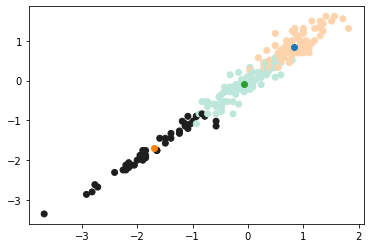

In [ ]:
k_means3 = KMeans(n_clusters = 3)
k_means3.fit(st)
centers = k_means3.cluster_centers_
labels3 =k_means3.labels_
plt.scatter(st[:,0],st[:,1], c=labels3, cmap = 'icefire_r')
plt.scatter(centers[0][0],centers[0][1])
plt.scatter(centers[1][0],centers[1][1])
plt.scatter(centers[2][0],centers[2][1])

In [ ]:
dot = pd.DataFrame(data = st)
dot[7] = pd.DataFrame(data = labels3)

In [ ]:
#діаметри
class_0 = dot[dot[7] == 0].reset_index(drop=True).drop(columns = 7)
class_1 = dot[dot[7] == 1].reset_index(drop=True).drop(columns = 7)
class_2 = dot[dot[7] == 2].reset_index(drop=True).drop(columns = 7)

dists0 = euclidean_distances(class_0).max()
dists1 = euclidean_distances(class_1).max()
dists2 = euclidean_distances(class_2).max()

dists0, dists1, dists2

(5.858455147394272, 4.954141912152787, 3.378021522774352)

In [ ]:
#радіус
radius_class_0 = np.linalg.norm(class_0 - centers[0], axis=1).reshape(-1,1).max()
radius_class_1 = np.linalg.norm(class_1 - centers[1], axis=1).reshape(-1,1).max()
radius_class_2 = np.linalg.norm(class_2 - centers[2], axis=1).reshape(-1,1).max()
radius_class_0, radius_class_1, radius_class_2

(4.435636615583771, 3.2128493690337594, 1.8686223750316693)

In [ ]:
#міжкластерна відстань
class_dists = euclidean_distances(centers).max()
class_dists

6.455694601785148

In [ ]:
#близькість кластерів(одиночний зв'язок)
class_0 = dot[dot[7] == 0].reset_index(drop=True).drop(columns = 7)
class_1 = dot[dot[7] == 1].reset_index(drop=True).drop(columns = 7)
class_2 = dot[dot[7] == 2].reset_index(drop=True).drop(columns = 7)

join01 = cdist(class_0, class_1).min()
join02 = cdist(class_0, class_2).min()
join12 = cdist(class_1, class_2).min()

join01, join02, join12

(3.4541229243154628, 0.36743886144759935, 0.4254881603752529)

###Agglomerative

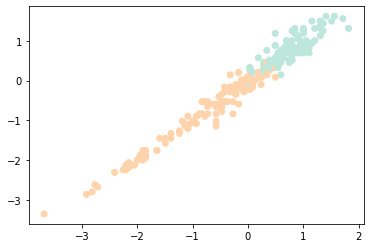

In [ ]:
Agglomerat2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean')
Agglomerat2 = Agglomerat2.fit_predict(st)
plt.scatter(st[:,0],st[:,1], c = Agglomerat2, cmap='icefire_r')

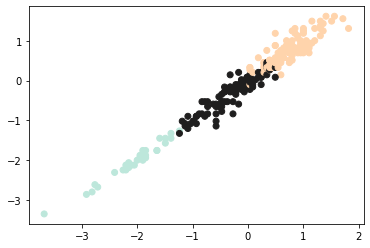

In [ ]:
Agglomerat3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
Agglomerat3 = Agglomerat3.fit_predict(st)
plt.scatter(st[:,0],st[:,1], c=Agglomerat3, cmap='icefire_r')

###Spectral

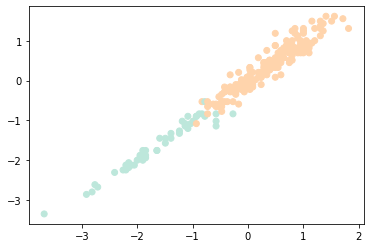

In [ ]:
Spectral2 = SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=0)
Spectral2 = Spectral2.fit_predict(st)
plt.scatter(st[:,0],st[:,1], c=Spectral2, cmap='icefire_r')

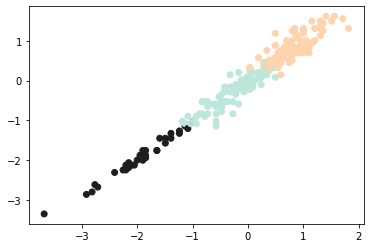

In [ ]:
Spectral3 = SpectralClustering(n_clusters=3, assign_labels='discretize', random_state=0)
Spectral3p = Spectral3.fit_predict(st)
plt.scatter(st[:,0],st[:,1], c=Spectral3p, cmap='icefire_r')

###Дендрограма для перших 100 записів.

In [ ]:
fig = ff.create_dendrogram(df.values[:100])
fig.update_layout(width=1200, height=600)
fig.show()

###Застосувати метод K-Means і декілька варіантів кількості кластерів. 

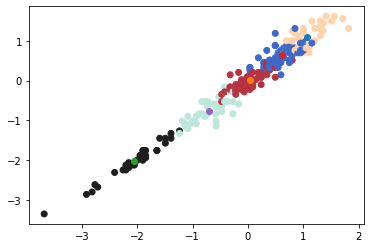

In [ ]:
k_means5 = KMeans(n_clusters = 5)
k_means5.fit(st)
centers = k_means5.cluster_centers_
labels5 =k_means5.labels_
plt.scatter(st[:,0],st[:,1], c=labels5, cmap = 'icefire_r')
plt.scatter(centers[0][0],centers[0][1])
plt.scatter(centers[1][0],centers[1][1])
plt.scatter(centers[2][0],centers[2][1])
plt.scatter(centers[3][0],centers[3][1])
plt.scatter(centers[4][0],centers[4][1])

In [ ]:
dot = pd.DataFrame(data = st)
dot[7] = pd.DataFrame(data = labels5)

In [ ]:
#діаметр
class_0 = dot[dot[7] == 0].reset_index(drop=True).drop(columns = 7)
class_1 = dot[dot[7] == 1].reset_index(drop=True).drop(columns = 7)
class_2 = dot[dot[7] == 2].reset_index(drop=True).drop(columns = 7)
class_3 = dot[dot[7] == 3].reset_index(drop=True).drop(columns = 7)
class_4 = dot[dot[7] == 4].reset_index(drop=True).drop(columns = 7)

dists0 = euclidean_distances(class_0).max()
dists1 = euclidean_distances(class_1).max()
dists2 = euclidean_distances(class_2).max()
dists3 = euclidean_distances(class_3).max()
dists4 = euclidean_distances(class_4).max()

dists0, dists1, dists2, dists3, dists4

(4.571172736382359,
 2.314409513262644,
 3.8203410860343205,
 2.804287543231407,
 2.103529775071299)

In [ ]:
#радіус
radius_class_0 = np.linalg.norm(class_0 - centers[0], axis=1).reshape(-1,1).max()
radius_class_1 = np.linalg.norm(class_1 - centers[1], axis=1).reshape(-1,1).max()
radius_class_2 = np.linalg.norm(class_2 - centers[2], axis=1).reshape(-1,1).max()
radius_class_3 = np.linalg.norm(class_3 - centers[3], axis=1).reshape(-1,1).max()
radius_class_4 = np.linalg.norm(class_4 - centers[4], axis=1).reshape(-1,1).max()

radius_class_0, radius_class_1, radius_class_2, radius_class_3, radius_class_4

(3.5178965450076363,
 1.3982087652868616,
 2.5794241961985254,
 1.8009438370133624,
 1.301596160825203)

In [ ]:
#міжкластерну відстань
class_dists = euclidean_distances(centers).max()
class_dists

8.079439675213878

In [ ]:
#близькість кластерів(одиночний зв'язок)
class_0 = dot[dot[7] == 0].reset_index(drop=True).drop(columns = 7)
class_1 = dot[dot[7] == 1].reset_index(drop=True).drop(columns = 7)
class_2 = dot[dot[7] == 2].reset_index(drop=True).drop(columns = 7)
class_3 = dot[dot[7] == 3].reset_index(drop=True).drop(columns = 7)
class_4 = dot[dot[7] == 4].reset_index(drop=True).drop(columns = 7)

join01 = cdist(class_0, class_1).min()
join02 = cdist(class_0, class_2).min()
join03 = cdist(class_0, class_3).min()
join04 = cdist(class_0, class_4).min()

join12 = cdist(class_1, class_2).min()
join13 = cdist(class_1, class_3).min()
join14 = cdist(class_1, class_4).min()

join23 = cdist(class_2, class_3).min()
join24 = cdist(class_2, class_4).min()

join34 = cdist(class_2, class_4).min()


join01, join02, join03, join04, join12, join13, join14, join23,join24, join34 

(2.122353357208796,
 5.9089622716828725,
 0.44224520647869014,
 3.8859544839176285,
 2.394538459246945,
 0.25744663105158844,
 0.40202386783702415,
 4.135406204059271,
 0.3538056824243926,
 0.3538056824243926)

###Застосувавши алгоритм DBSCAN і ще один будь-який алгоритм з використаної бібліотеки.

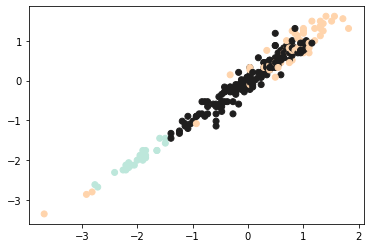

In [ ]:
DBSCAN_model = DBSCAN(eps=0.6, min_samples=10)
DBSCAN_model.fit(st)
DBSCAN_label = DBSCAN_model.labels_
plt.scatter(st[:,0],st[:,1], c=DBSCAN_label, cmap='icefire_r')

**Частина 2. Власна реалізації алгоритму кластеризації.**
1. Обрати відповідний файл з даними.
2. Обравши всі стовпчики, крім першого:

a) запрограмуйте алгоритм DBSCAN і проведіть розбиття даних за цим методом при різних значеннях $\epsilon$ (радіуса околу). Для порівняння результатів розбиття можна використовувати бібліотечну реалізацію методу.

б) Результати розбиття проілюструвати графічно, виконати порівняльний аналіз отриманих результатів із результатами бібліотечної версії.

в) Виконати розбиття даних, використовуючи K-Means і будь-який ще один алгоритм. Для отримання результатів можна використовувати бібліотеки для мови Python.

г) Порівняти результати кластеризації.

###lib and data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import math
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [ ]:
file_url = "https://raw.githubusercontent.com/IvanSergeyevichZhuk/ML_KPI/main/Data/Lab3/Part2/MN/MN09-Kovalenko.csv"
data = pd.read_csv(file_url,names=[0,1,2,3]).astype("float64")
data

,0,1,2,3
0,95430010.0,9.991931,56.783064,48.408430
1,95430010.0,9.992832,56.783052,48.345524
2,95430010.0,9.992983,56.782946,47.814460
3,95430010.0,9.993015,56.782600,46.632717
4,95430010.0,9.993154,56.782488,46.536126
...,...,...,...,...
495,37759037.0,9.932989,57.028787,39.592208
496,37759037.0,9.932844,57.028606,37.677818
497,37759037.0,9.932672,57.028363,35.546436
498,37759037.0,9.932561,57.028221,34.137492


In [ ]:
data = data.drop(columns = 0)
st = StandardScaler().fit_transform(data)
st

array([[ 0.80203319, -1.32313248,  1.46795787],
       [ 0.80383641, -1.3231995 ,  1.46441507],
       [ 0.80413694, -1.32380556,  1.43450618],
       ...,
       [ 0.68346172,  0.08202646,  0.74358497],
       [ 0.68323942,  0.08120788,  0.66423484],
       [ 0.68279562,  0.07950771,  0.52822994]])

### DBSCAN

In [ ]:
class DBSCAN_handmade:

  def __init__(self, eps, min_samples):
    self.min_samples = min_samples
    self.eps = eps

  def neighbor(self, x, data):
    id = []
    for y, dot in enumerate(data):
      if x != y and np.linalg.norm(data[x] - dot) <= self.eps:
        id.append(y)
    return id

  def check(self, x, data, cluster):
    for id in self.neighbor(x, data):
          if self.dot_cluster[id] == -1:
            self.dot_cluster[id] = cluster
            if len(self.neighbor(x, data)) >= self.min_samples:
              self.check

  def fit(self, data):
    cluster = 0 
    self.dot_cluster = [-1] * len(data)
    for x, dot_x in enumerate(data):
      if self.dot_cluster[x] != -1:
        continue
      if len(self.neighbor(x, data)) >= self.min_samples:
        self.dot_cluster[x] = cluster
        self.check(x, data, cluster)
      cluster += 1
    return self.dot_cluster

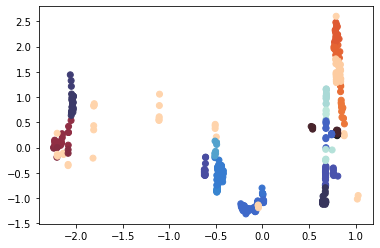

In [ ]:
DBSCAN_model = DBSCAN_handmade(eps=0.3, min_samples=10)
DBSCAN_model.fit(st)
plt.scatter(st[:,0], st[:,2], c = DBSCAN_model.fit(st) , cmap='icefire_r')

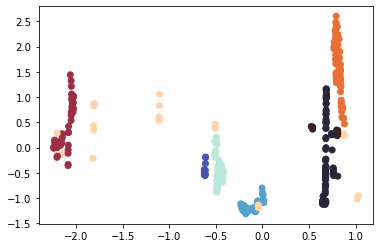

In [ ]:
DBSCAN_model = DBSCAN(eps=0.3, min_samples=10)
DBSCAN_model.fit(st)
DBSCAN_label = DBSCAN_model.labels_
plt.scatter(st[:,0],st[:,2], c=DBSCAN_label, cmap='icefire_r')

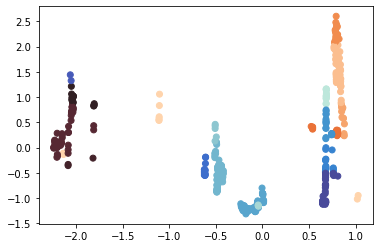

In [ ]:
DBSCAN_model = DBSCAN_handmade(eps=0.6, min_samples=10)
DBSCAN_model.fit(st)
plt.scatter(st[:,0],st[:,2], c = DBSCAN_model.fit(st) , cmap='icefire_r')

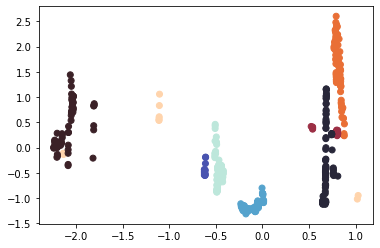

In [ ]:
DBSCAN_model = DBSCAN(eps=0.6, min_samples=10)
DBSCAN_model.fit(st)
DBSCAN_label = DBSCAN_model.labels_
plt.scatter(st[:,0],st[:,2], c=DBSCAN_label, cmap='icefire_r')

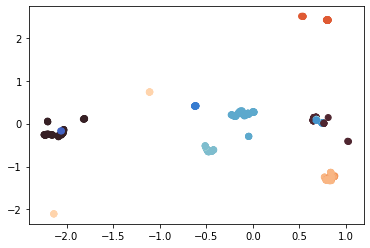

In [ ]:
DBSCAN_model = DBSCAN_handmade(eps=0.8, min_samples=10)
DBSCAN_model.fit(st)
plt.scatter(st[:,0],st[:,1], c = DBSCAN_model.fit(st) , cmap='icefire_r')

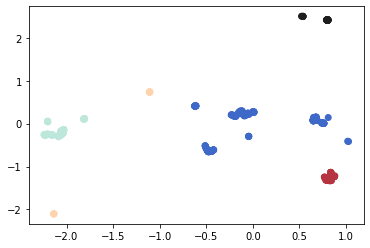

In [ ]:
DBSCAN_model = DBSCAN(eps=0.8, min_samples=10)
DBSCAN_model.fit(st)
DBSCAN_label = DBSCAN_model.labels_
plt.scatter(st[:,0],st[:,1], c=DBSCAN_label, cmap='icefire_r')

###K-means

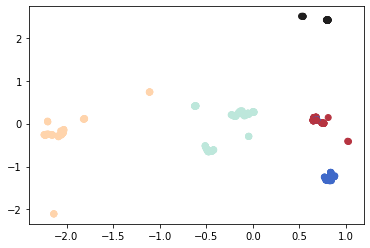

In [ ]:
k_means2 = KMeans(n_clusters = 5)
k_means2.fit(st)
centers = k_means2.cluster_centers_
labels2 =k_means2.labels_
plt.scatter(st[:,0],st[:,1], c=labels2, cmap = 'icefire_r')

###Agglomerate

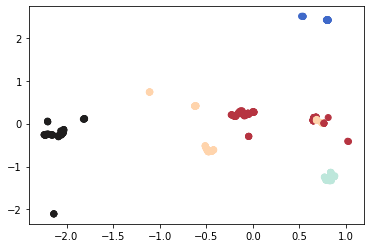

In [ ]:
Agglomerat2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean')
Agglomerat2 = Agglomerat2.fit_predict(st)
plt.scatter(st[:,0],st[:,1], c = Agglomerat2, cmap='icefire_r')